## Importar bibliotecas y leer los datos

In [4]:
import numpy as np
import pandas as pd
import  random 
from google.colab import files  #para subir archivos a colab

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
files.upload()

Saving loan_prediction.csv to loan_prediction.csv


{'loan_prediction.csv': b'Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status\r\nLP001002,Male,No,0,Graduate,No,5849,0,,360,1,Urban,Y\r\nLP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N\r\nLP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y\r\nLP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y\r\nLP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y\r\nLP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y\r\nLP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y\r\nLP001014,Male,Yes,3+,Graduate,No,3036,2504,158,360,0,Semiurban,N\r\nLP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,Y\r\nLP001020,Male,Yes,1,Graduate,No,12841,10968,349,360,1,Semiurban,N\r\nLP001024,Male,Yes,2,Graduate,No,3200,700,70,360,1,Urban,Y\r\nLP001027,Male,Yes,2,Graduate,,2500,1840,109,360,1,Urban,Y\r\nLP001028,Male,Yes,2,Graduate,No,3073,8106,200,360,1,U

In [6]:
mis_datos = pd.read_csv('loan_prediction.csv',
                   index_col='Loan_ID' ).dropna()

In [7]:
mis_datos.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [8]:
mis_datos.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [9]:
mis_datos['Credit_History'].value_counts()

1.0    410
0.0     70
Name: Credit_History, dtype: int64

In [ ]:
mis_datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, LP001003 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    float64
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(5), object(7)
memory usage: 48.8+ KB


In [10]:
# Credit History está como float64, por ende lo toma en el decribe como numérico, pero es boolean
mis_datos['Credit_History'] = mis_datos['Credit_History'].astype('object')
mis_datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, LP001003 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    object 
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 48.8+ KB


## Espacio de probabilidad de variables categóricas





¿Se puede determinar el espacio de probabilidad para cada variable con la siguiente información?

In [11]:
# 
datos_categoricos = mis_datos.select_dtypes('object')
# hace un describe con todas las varibles categóricas
datos_categoricos.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,480,480,480,480,480,480.0,480,480
unique,2,2,4,2,2,2.0,3,2
top,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,394,311,274,383,414,410.0,191,332


### Determinar el espacio muestral y la distribución de probabilidad para cada uno de las variables

Evento aleatrorio: elegir al azar un solo registro de la base de datos.


In [12]:
for col in datos_categoricos.columns:
  print('{} \n{}\n'.format(col.upper(), datos_categoricos[col].value_counts()))

GENDER 
Male      394
Female     86
Name: Gender, dtype: int64

MARRIED 
Yes    311
No     169
Name: Married, dtype: int64

DEPENDENTS 
0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

EDUCATION 
Graduate        383
Not Graduate     97
Name: Education, dtype: int64

SELF_EMPLOYED 
No     414
Yes     66
Name: Self_Employed, dtype: int64

CREDIT_HISTORY 
1.0    410
0.0     70
Name: Credit_History, dtype: int64

PROPERTY_AREA 
Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

LOAN_STATUS 
Y    332
N    148
Name: Loan_Status, dtype: int64



### Gráficas de la distribución de probabilidad

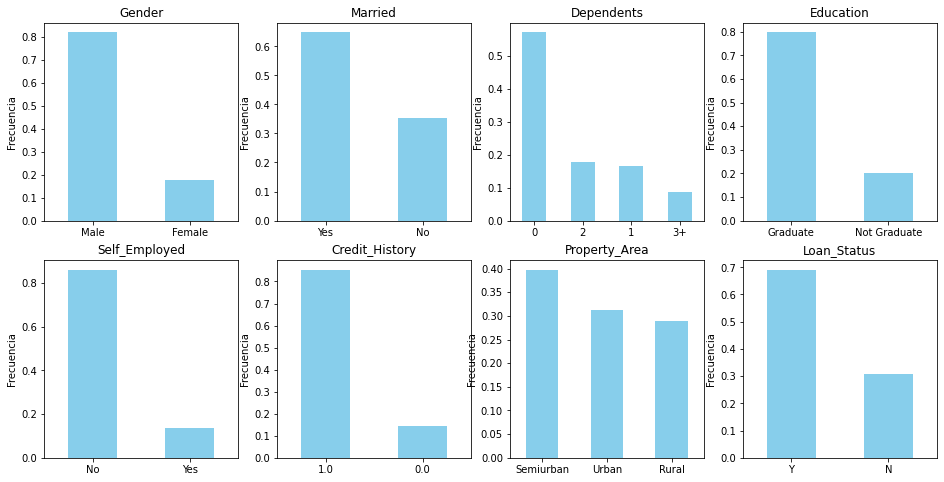

In [17]:
fig, axes = plt.subplots(2,4, figsize=(16, 8))

for col, subplot in zip(datos_categoricos, axes.flatten()):     
    mis_datos[col].value_counts(normalize=True).plot(kind='bar',
                                                     rot=0,
                                                     color='skyblue',
                                                     ax=subplot)
    subplot.set(ylabel='Frecuencia', title = col)
 


## Espacio de probabilidad para variables numéricas

In [18]:
datos_numericos = mis_datos.select_dtypes(include=['float64', 'int64'])

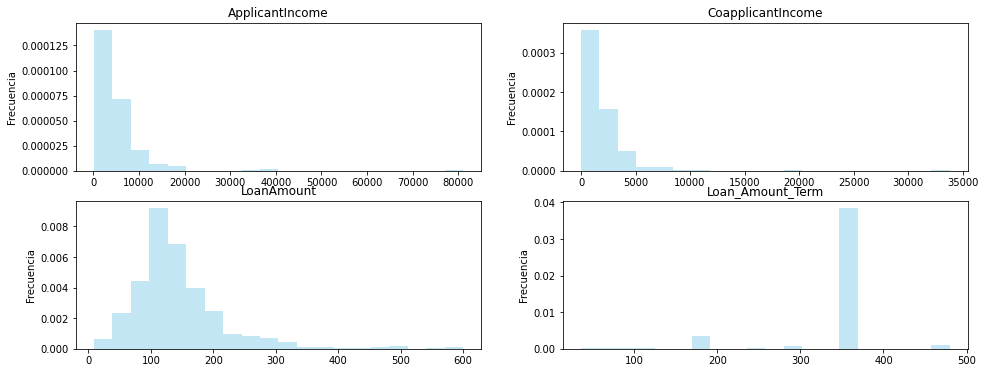

In [20]:
fig, axes = plt.subplots(2,2, figsize=(16, 6))

for col, subplot in zip(datos_numericos, axes.flatten()):     
    mis_datos[col].plot(kind='hist', density=1, 
                        bins=20, stacked=False, 
                        alpha=.5, color='skyblue',
                        ax=subplot)
    subplot.set(ylabel='Frecuencia', title = col)